### РГР №1 по предмету: Математическая статистика

**Выполнил:** Владимиров Артём Сергеевич. Студент группы: R3340. Поток: Мат Стат 31.3\
**Преподаватель:** Береговенко Илья Игоревич. Ассистент, Научно-образовательный центр математики\
**Вариант выполнения:** №5

### Задание 1. (для выборки А)

Импортируем библиотеку numpy для хранения выборки и работы с ней.

Размах выборки - разность между максимальным и минимальным элементами выборки

In [1]:
import numpy as np

# Данные выборки
A = np.array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,  
              1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
              0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 
              1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 
              0, 1, 0])

# Максимальный и минимальный элементы
min_A = np.min(A)
max_A = np.max(A)

# Размах выборки
range_A = max_A - min_A

min_A, max_A, range_A

(0, 2, 2)

Минимальный элемент выборки: 0. Максимальный элемент: 2. Размах выборки: 2.

Начертим полигон частот выборки A. Для этого необходимо подсчитать количество вхождений уникальных значений в выборке (используем Counter для подсчета количества уникальных значений, информация хранится в мапе stat_series).

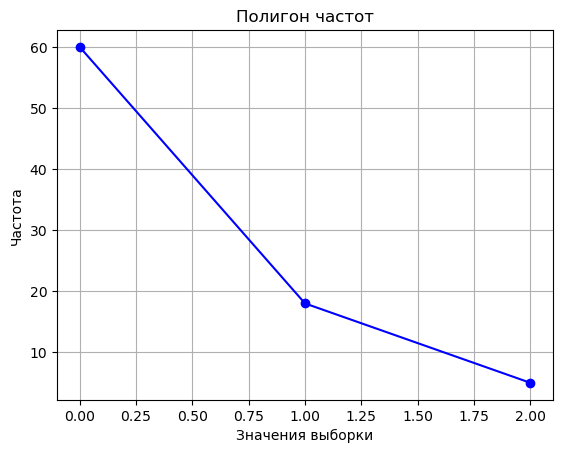

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Статистический ряд
stat_series = Counter(A)
sorted_stat_series = sorted(stat_series.items())

# Построение полигона частот
x_vals, y_vals = zip(*sorted_stat_series)
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
plt.title("Полигон частот")
plt.xlabel("Значения выборки")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

Построим график эмпирической функции распределения. Эмпирическая функция распределения определяется равенством: число выборочных значений, меньших x, деленное на объем выборки. Имеет ступенчатый вид, так как изучаемый количественный признак - дискретный.

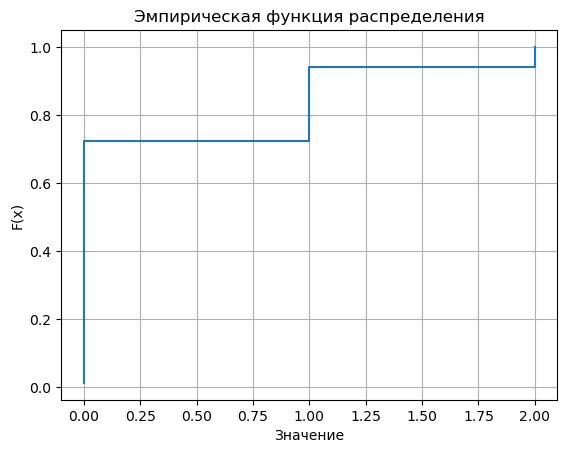

In [5]:
# Эмпирическая функция распределения
n = len(A)
sorted_A = np.sort(A)
F_empirical = np.arange(1, n+1) / n

# Построение графика эмпирической функции распределения
plt.step(sorted_A, F_empirical, where='post')
plt.title("Эмпирическая функция распределения")
plt.xlabel("Значение")
plt.ylabel("F(x)")
plt.grid(True)
plt.show()

Вычислим начальные и центральные моменты до 4-го порядка и выведем их.

In [6]:
# Начальные моменты
mean_A = np.mean(A)
moments_1 = mean_A
moments_2 = np.mean(A**2)
moments_3 = np.mean(A**3)
moments_4 = np.mean(A**4)

# Центральные моменты
central_moments_2 = np.mean((A - mean_A)**2)
central_moments_3 = np.mean((A - mean_A)**3)
central_moments_4 = np.mean((A - mean_A)**4)

moments_1, moments_2, moments_3, moments_4, central_moments_2, central_moments_3, central_moments_4

(0.3373493975903614,
 0.4578313253012048,
 0.6987951807228916,
 1.180722891566265,
 0.3440267092466251,
 0.3122316526958467,
 0.5115357957985914)

Найдем моду, медиану, коэффициенты ассиметрии и эксцесса, используя соответствующие функции mode, median, skew и kurtosis.

In [7]:
from scipy import stats

# Мода
mode_A = stats.mode(A)

# Медиана
median_A = np.median(A)

# Коэффициент асимметрии
skewness_A = stats.skew(A)

# Коэффициент эксцесса (исправленный)
kurtosis_A = stats.kurtosis(A, fisher=True)

mode_A, median_A, skewness_A, kurtosis_A

(ModeResult(mode=0, count=60), 0.0, 1.5473504514669927, 1.3220691128558455)

Видим, что мода равна 0 (самое частое значение (в количестве 60)), медиана равна 0, коэффициент асимметрии и эксцесса равны 1.55 и 1.32 соответственно.

Эксцесс > 0, следовательно, распределенние выборки островершинное.

По виду полигона частот и эмпирической функции можно выдвинуть гипотезу, что распределение генеральной совокупности имеет распределение Пуассона с параметром λ < 1.

Оценим параметр λ распределения Пуассона методом максимального правдопободия.\
Заметим, что для распределения Пуассона, параметром лямбда будт являться среднее-выборочное

In [9]:
# 1. Оценка параметра λ для распределения Пуассона
lambda_estimate = np.mean(A)

print(f"Оценка параметра λ методом максимального правдоподобия: {lambda_estimate}")

# 2. Проверка гипотезы: сопоставление с теоретическим распределением Пуассона
# Сравним эмпирическое распределение выборки с теоретическим распределением Пуассона

# Построим эмпирическое распределение выборки
values, counts = np.unique(A, return_counts=True)
prob_empirical = counts / len(A)

# Теоретическое распределение Пуассона с оцененным параметром λ
poisson_prob = stats.poisson.pmf(values, lambda_estimate)

# Вывод результатов
print("\nЭмпирическое распределение:")
for v, p in zip(values, prob_empirical):
    print(f"Значение: {v}, Частота: {p:.4f}")

print("\nТеоретическое распределение Пуассона с λ =", lambda_estimate)
for v, p in zip(values, poisson_prob):
    print(f"Значение: {v}, Вероятность: {p:.4f}")

Оценка параметра λ методом максимального правдоподобия: 0.3373493975903614

Эмпирическое распределение:
Значение: 0, Частота: 0.7229
Значение: 1, Частота: 0.2169
Значение: 2, Частота: 0.0602

Теоретическое распределение Пуассона с λ = 0.3373493975903614
Значение: 0, Вероятность: 0.7137
Значение: 1, Вероятность: 0.2408
Значение: 2, Вероятность: 0.0406


### Задание 2. (для выборки B)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm, mode

# Исходные данные (выборка B)
data = np.array([34, 14, -14, 10, 9, 29, 27, -1, -4, 17, 23, 13, 18, -17, -22, 1, 8, -9, 3, 11, 6, 
                 26, 6, 8, 16, 19, 22, -8, 23, -5, 17, -21, -20, -17, 16, 3, 6, 25, 0, 4, 5, 6, 
                 -21, -2, 8, -6, 11, 3, -2, 17, 13, 8, 27, 11, 9, 12, 12, -1, 25, 4, 19, -8, 29, 
                 0, -13, 0, 9, 26, 19, 29, 9, 22, 30, 13, 19, -1, -10, 20, -7, 21, 10, -5, -2, 
                 -10, 1, 12, 8, 35, 11, 15, 13, 2, -5, -12, 11, 9, 34, 9, -2, -20, -4, 2, 19, 31, 
                 31, -11, -7, 23, -20, -2, -12, -3, 13, -7, 15, 8, -9, 19, -8, 12, 8, 30, -22, 8, 
                 -9, 19, 17, 28, 26, 6, -7, 0, -9, 7, 11, 20, 23, 12, 19, 52, -10, 32, 29, 33, 3, 
                 -8, 5, -4, 9, 18, -16, 0, -8, 25, 32, 26, -1, -5, 6, 5, 21, 9, 17, 21, 33, 7, 
                 19, -2, 6, 14, 8, 14, 27, 16, -6, -2, -3, 19, -9, -7, -3, 1, 20, 18, 4, -4, 20, 
                 14, 28, -9, -2, 34, -16, -9, 5, 20, 8, 25, 7, 19, -5, 2, 5, 1, 6, -7, 4, -14, 3, 
                 2, 24, -5, 4, 24, 30, 21, 7, 27, 12, 36, 13, -2, 18])

# 1. Максимальный и минимальный элементы выборки, размах выборки
min_val = np.min(data)
max_val = np.max(data)
range_val = max_val - min_val

print(f"Минимальный элемент: {min_val}")
print(f"Максимальный элемент: {max_val}")
print(f"Размах выборки: {range_val}")

Минимальный элемент: -22
Максимальный элемент: 52
Размах выборки: 74


Определим оптимальное количество интервалов группировки с помощью формулы Стерджесса

In [13]:
# 2. Оптимальное количество интервалов группировки и длина интервала
n = len(data)
k = int(np.ceil(1 + 3.322 * np.log10(n)))  # Формула Стерджесса
interval_len = (max_val - min_val) / k

print(f"Оптимальное количество интервалов: {k}")
print(f"Длина интервала группировки: {interval_len:.2f}")

Оптимальное количество интервалов: 9
Длина интервала группировки: 8.22


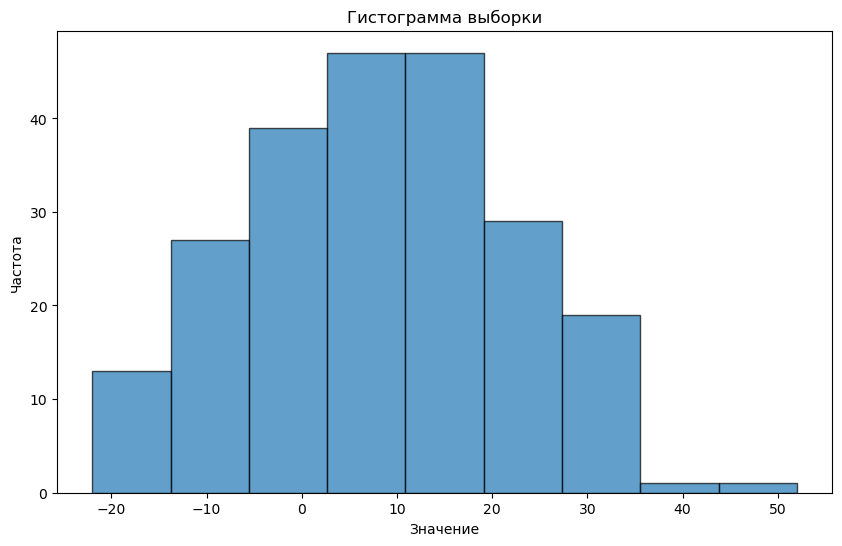

In [14]:
# 3. Интервальный ряд и гистограмма
hist, bin_edges = np.histogram(data, bins=k)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=k, edgecolor='black', alpha=0.7)
plt.title('Гистограмма выборки')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

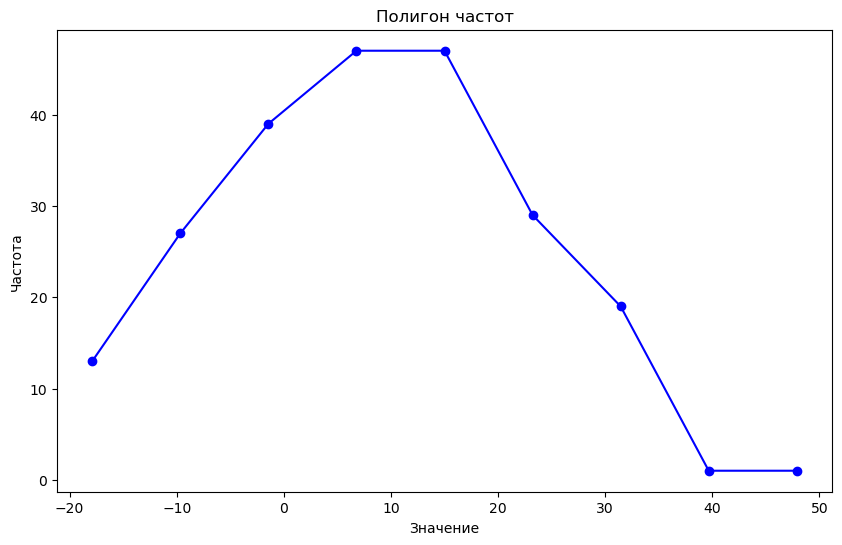

In [15]:
# Полигон частот
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, marker='o', linestyle='-', color='blue')
plt.title('Полигон частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

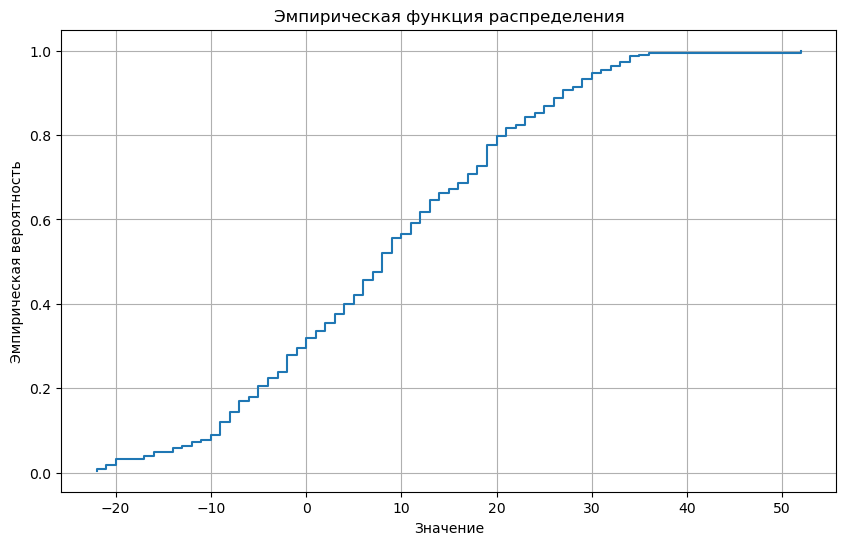

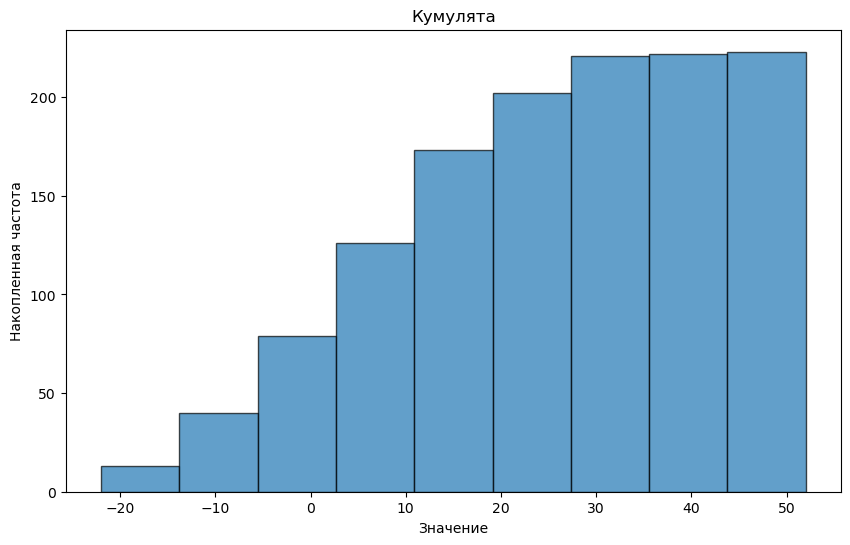

In [16]:
# 4. Эмпирическая функция распределения и её график, кумулята
sorted_data = np.sort(data)
ecdf = np.arange(1, n+1) / n

plt.figure(figsize=(10, 6))
plt.step(sorted_data, ecdf, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Эмпирическая вероятность')
plt.grid(True)
plt.show()

# Кумулята (интеграл гистограммы)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=k, cumulative=True, edgecolor='black', alpha=0.7)
plt.title('Кумулята')
plt.xlabel('Значение')
plt.ylabel('Накопленная частота')
plt.show()

In [17]:
# 5. Эмпирические моменты до 4-го порядка
mean = np.mean(data)
moments = [np.mean(data**i) for i in range(1, 5)]
central_moments = [np.mean((data - mean)**i) for i in range(1, 5)]

print(f"Начальные моменты: {moments}")
print(f"Центральные моменты: {central_moments}")

Начальные моменты: [8.26457399103139, 265.00896860986546, 5592.5156950672645, 187493.3139013453]
Центральные моменты: [-7.64709670773202e-16, 196.7057853566329, 150.95043061645217, 97224.03722247899]


In [19]:
# 6. Мода, медиана, коэффициенты асимметрии и эксцесса
mode_val = mode(data)[0]   # Используем только первое значение из результата
median_val = np.median(data)
skewness = skew(data)
kurt = kurtosis(data)

print(f"Мода: {mode_val}")
print(f"Медиана: {median_val}")
print(f"Коэффициент асимметрии: {skewness:.2f}")
print(f"Коэффициент эксцесса: {kurt:.2f}")

Мода: 19
Медиана: 8.0
Коэффициент асимметрии: 0.05
Коэффициент эксцесса: -0.49


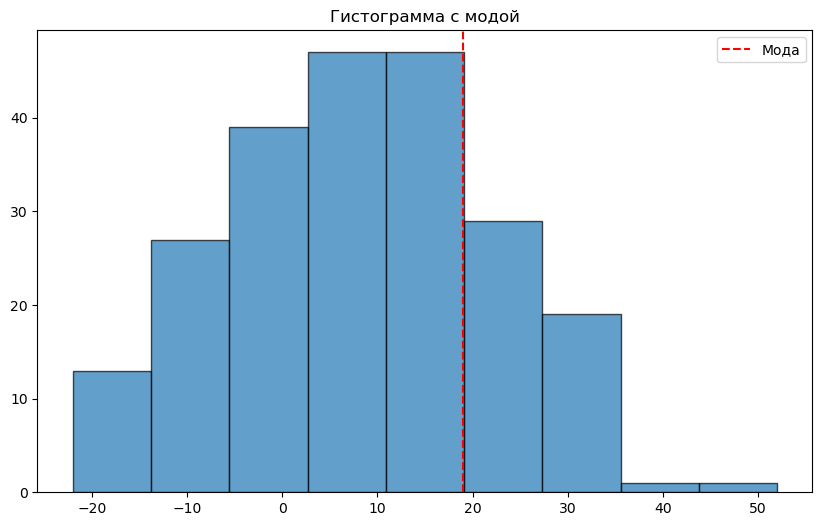

In [20]:
# Отметка моды на гистограмме
plt.figure(figsize=(10, 6))
plt.hist(data, bins=k, edgecolor='black', alpha=0.7)
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=1.5, label='Мода')
plt.legend()
plt.title('Гистограмма с модой')
plt.show()

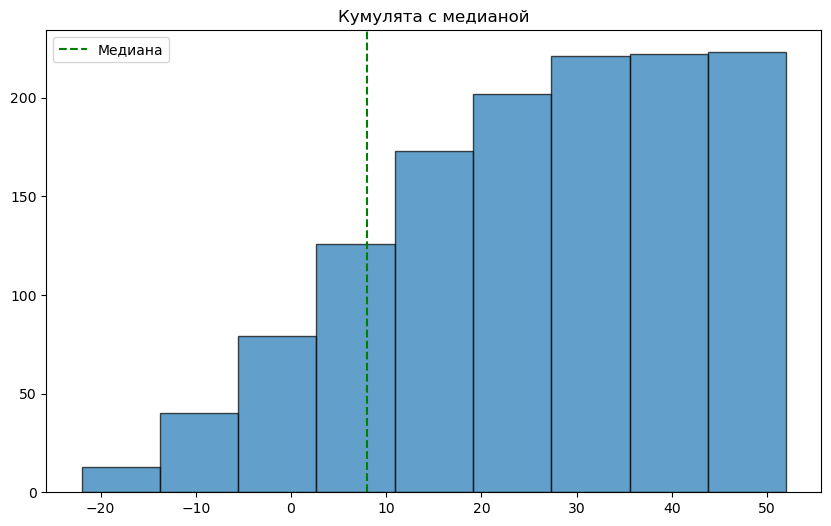

In [21]:
# Отметка медианы на кумуляте
plt.figure(figsize=(10, 6))
plt.hist(data, bins=k, cumulative=True, edgecolor='black', alpha=0.7)
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label='Медиана')
plt.legend()
plt.title('Кумулята с медианой')
plt.show()

Выводы: гистограмма и полигон частот близки к нормальному распределению. На это указывает и значение (приближенное к 0) коэффициента асимметрии. Поэтому можно предположить нормальность распределения генеральной совокупности.

Оценка параметров нормального распределения: μ = 8.26, σ = 14.03


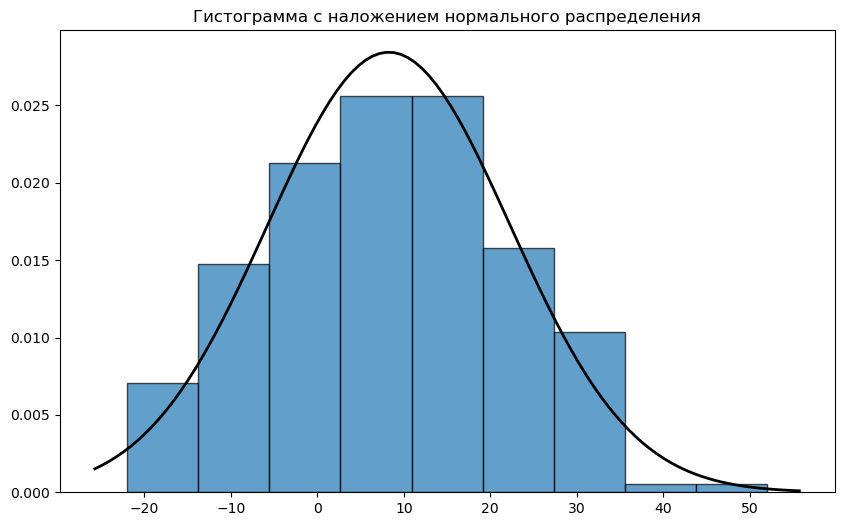

In [22]:
# 7. Оценка параметров распределения методом максимального правдоподобия
(mu, sigma) = norm.fit(data)
print(f"Оценка параметров нормального распределения: μ = {mu:.2f}, σ = {sigma:.2f}")

# Построение нормального распределения поверх гистограммы
plt.figure(figsize=(10, 6))
plt.hist(data, bins=k, density=True, edgecolor='black', alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Гистограмма с наложением нормального распределения')
plt.show()